# Assignment 4 - Unsupervised Learning and More Supervised Learning

## *Danny Witt*
Netid:  *drw48*

## 1

### [35 points] Clustering

Clustering can be used to determine structure, assign group membership, and representing data through compression. Here you'll dive deeply into clustering exploring the impact of a number of classifiers on 

**(a)** Implement your own k-means algorithm. Demonstrate the efficacy of your algorithm on the `blobs` dataset from `scikit-learn` with 2 and 5 cluster centers. For each implementation rerun the k-means algorithm for values of k from 1 to 10 and for each plot the "elbow curve" where you plot the sum of square error. For each case, where is the elbow in the curve? Explain why.

**(b)** Briefly explain in 1-2 sentences each (and at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering

**(c)** For each of the clustering algorithms in (b) run each of them on the five datasets below. Tune the parameters in each model to achieve better performance. Plot the final result as a 4-by-5 subplot showing the performance of each method on each dataset. Which methods work best/worst on each dataset and why?
- Aggregation.txt
- Compound.txt
- D31.txt
- jain.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

**ANSWER**

**1a**

In [1]:
from sklearn.datasets import make_blobs
from sklearn.datasets.samples_generator import make_blobs

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

class K_Means:
    
    def __init__(self, k=3, tol=0.00001, max_iter=100):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        return

    def fit(self, data):
        '''The first step assigns each sample to its nearest centroid. The second step creates new centroids by 
        taking the mean value of all of the samples assigned to each previous centroid. The difference between the 
        old and the new centroids are computed and the algorithm repeats these last two steps until this value is 
        less than a threshold. In other words, it repeats until the centroids do not move significantly.
        '''
        
        self.data = data
        
        self.centroids = {}
        
        self.distances = []

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                self.distances.append(min(distances))

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
                for c in self.centroids:
                    original_centroid = prev_centroids[c]
                    current_centroid = self.centroids[c]
        return 
    
    def inertia(self):
        '''Class method to generate within cluster sum of squares, where euclidean distance is determined
        for each sample relative to the classified centroid.
        '''
        sum_squares = sum([x**2 for x in self.distances])
        return sum_squares
    
    def predict(self):
        
        self.classifications = {}
        
        for i in range(self.k):
            self.classifications[i] = []
        
        for i in self.data:
            distances = [np.linalg.norm(i - self.centroids[centroid]) for centroid in self.centroids]
            classification = distances.index(min(distances))  
            self.classifications[classification].append(i)
        return self.classifications
    
    def plot(self, title):
        colors = 10*["r","c","g","b","k"]
        for classification in self.classifications:
            color = colors[classification]
            for featureset in self.classifications[classification]:
                plt.scatter(featureset[0], featureset[1], marker="o", color=color, s=25, edgecolors='k')
            plt.title(title)
            plt.xlabel("x1")
            plt.ylabel("x2")
        return plt.show()


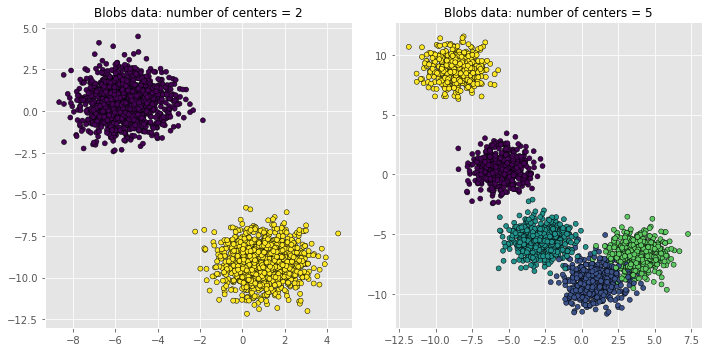

In [2]:
#1a: Implementation of own k-means algorithm on blobs dataset

#Import relevant packages:

%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.datasets.samples_generator import make_blobs

#Apply K-means model to two different Blob data sets:

#Starting model parameters:
n_samples = 2500
random_state = 16

#Generate "blob" data: centers = 2
X_2, y_2 = make_blobs(n_samples = n_samples, centers = 2, n_features = 2, random_state = random_state)

#Generate "blob" data: centers = 5
X_5, y_5 = make_blobs(n_samples= n_samples, centers= 5, n_features = 2, random_state = random_state)

fig = plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_2[:, 0], X_2[:, 1], marker='o', c=y_2,
            s=25, edgecolor='k')
plt.title("Blobs data: number of centers = 2", fontsize='large')
plt.subplot(1, 2, 2)
plt.scatter(X_5[:,0], X_5[:, 1], marker='o', c=y_5,
           s=25, edgecolor='k')
plt.title("Blobs data: number of centers = 5", fontsize = 'large')
plt.tight_layout()
plt.show()

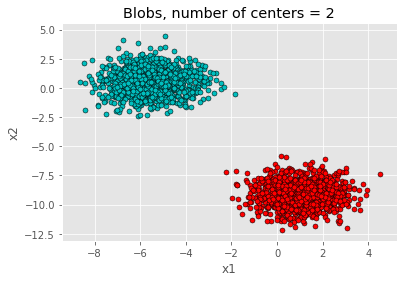

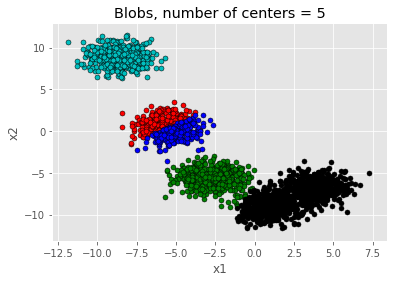

In [3]:
#Initialize k means class instance, fit, predict, and plot:

k_means_2 = K_Means(k=2)
k_means_2.fit(X_2)
k_means_2.predict()

k_means_5 = K_Means(k=5)
k_means_5.fit(X_5)
k_means_5.predict()

k_means_2.plot(title='Blobs, number of centers = 2')

k_means_5.plot(title='Blobs, number of centers = 5')

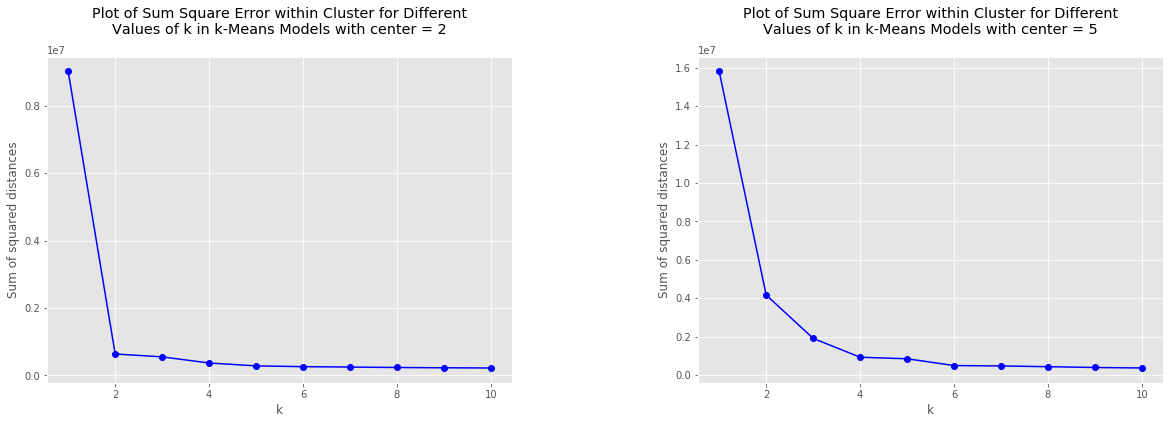

In [4]:
#Calculate error-- sum of squares:

#Generate list of k values for k-means model:
k_values = list(range(1,11))

#Initialize sum of squares list for collection of SSE of each model and future plotting:
Sum_of_squared_distances_c2 = []
Sum_of_squared_distances_c5 = []

#Generate instance of k-means model with (center = 2):
for k in k_values:
    k_means_model = K_Means(k=k)
    k_means_model.fit(X_2)
    sum_squares = k_means_model.inertia()
    Sum_of_squared_distances_c2.append(sum_squares)

#Generate instance of k-means model with (center = 5):
for k in k_values:
    k_means_model = K_Means(k=k)
    k_means_model.fit(X_5)
    sum_squares = k_means_model.inertia()
    Sum_of_squared_distances_c5.append(sum_squares)

#Plot both models on two data set parameters:

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, Sum_of_squared_distances_c2, 'bo-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
title1 = plt.title('Plot of Sum Square Error within Cluster for Different\nValues of k in k-Means Models with center = 2')
title1.set_position([.5, 1.05])

plt.subplot(1, 2, 2)
plt.plot(k_values, Sum_of_squared_distances_c5, 'bo-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
title2 = plt.title('Plot of Sum Square Error within Cluster for Different\nValues of k in k-Means Models with center = 5')
title2.set_position([.5, 1.05])

plt.subplots_adjust(wspace = 0.4)

plt.show()

**1b Briefly explain in 1-2 sentences each (and at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering:**

**K-means:** The model's goal is to separate samples into different clusters that reduce within group variance (or inertia, which is a description of within-group sum of squared difference between all samples with their assigned centroids). Centroids refer to the mean of predictor values for samples in a cluster. The algorithm can scale to very large number of samples, and is optimal for even cluster size, flat geometry, convex shaped clusters, and a relatively low number of clusters. 

**Agglomerative Clustering:** This model is a hierarchical clustering model which uses a bottom up approach, such that there are n starting clusters (where n= total samples) and then the clusters are successively combined. The model uses one of several options for linkage criteria (Ward, Maximum/Complete, Average, Single Linkages), which aim to reduce variance, maximum distance between points in clusters, average distances between all observations, or distance between closest observations in clusters, respectively. The model can accomodate large number of samples and large number of clusters. 

**Gaussian Mixture Models:** The model is a probabilistic model that uses expectation-maximization method for fitting a mixture-of-Gaussian model on samples which are presumed to be drawn from Gaussian distributions with unknown parameters. It generates the Mahalanobis distance to the centers of clusters, is good for density estimation, but does not scale well to large sample sizes. 

**DBSCAN:** The DBSCAN model is a density-based clustering technique which separates high from low density of samples, using distances between representative cluster sample points and other samples.  The technique identifies core samples (found in high density areas), non-core samples (close in distance, eps, to core samples), and outliers (which are samples greater than eps distance from a core sample). It takes the parameters minimum samples and eps, which determine how many non-core samples will be included as neighbors of a given core sample. Clusters can be any shape, depending on relative densities of samples. It performs well with very large sample sizes, non-flat geometry, and uneven cluster sizes. 

**Spectral Clustering:** The model's goal is to generate a given number of clusters by generating graph distance measurements (neartest-neighbor graph). Specifically, the model creates a low-dimension embedding of an affinity matrix between samples and then utilizes k-Means in the lower dimensional space. The model performs best with medium number of samples and small number of clusters.

**1c (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering models on four different data sets:**

In [5]:
import numpy as np
import pandas as pd
import os
os.chdir('/Users/dannywitt/Desktop/MIDS/IDS_705_ML/ids705/assignments/data/')

#Import these data sets:
#Aggregation.txt
#Compound.txt
#D31.txt
#jain.txt

data_agg = pd.read_csv('Aggregation.txt', sep='\t', header=None)
#data_agg.columns = ['x1', 'x2', 'NA']
#data_agg = data_agg.drop(['NA'], axis=1)
#data_agg.head()
agg_X = np.array(data_agg)
#print(agg_X)

data_comp = pd.read_csv('Compound.txt', sep='\t', header=None)
#data_comp.columns = ['x1', 'x2', 'NA']
#data_comp = data_comp.drop(['NA'], axis=1)
#data_comp.head()
comp_X = np.array(data_comp)
#print(comp_X)

data_d31 = pd.read_csv('D31.txt', sep='\t', header=None)
#data_d31.columns = ['x1', 'x2', 'NA']
#data_d31 = data_d31.drop(['NA'], axis=1)
#data_d31.head()
d31_X = np.array(data_d31)
#print(d31_X)

data_jain = pd.read_csv('jain.txt', sep='\t', header=None)
#data_jain.columns = ['x1', 'x2', 'NA']
#data_jain = data_jain.drop(['NA'], axis=1)
#data_jain.head()
jain_X = np.array(data_jain)
#print(jain_X)

random_state = 0

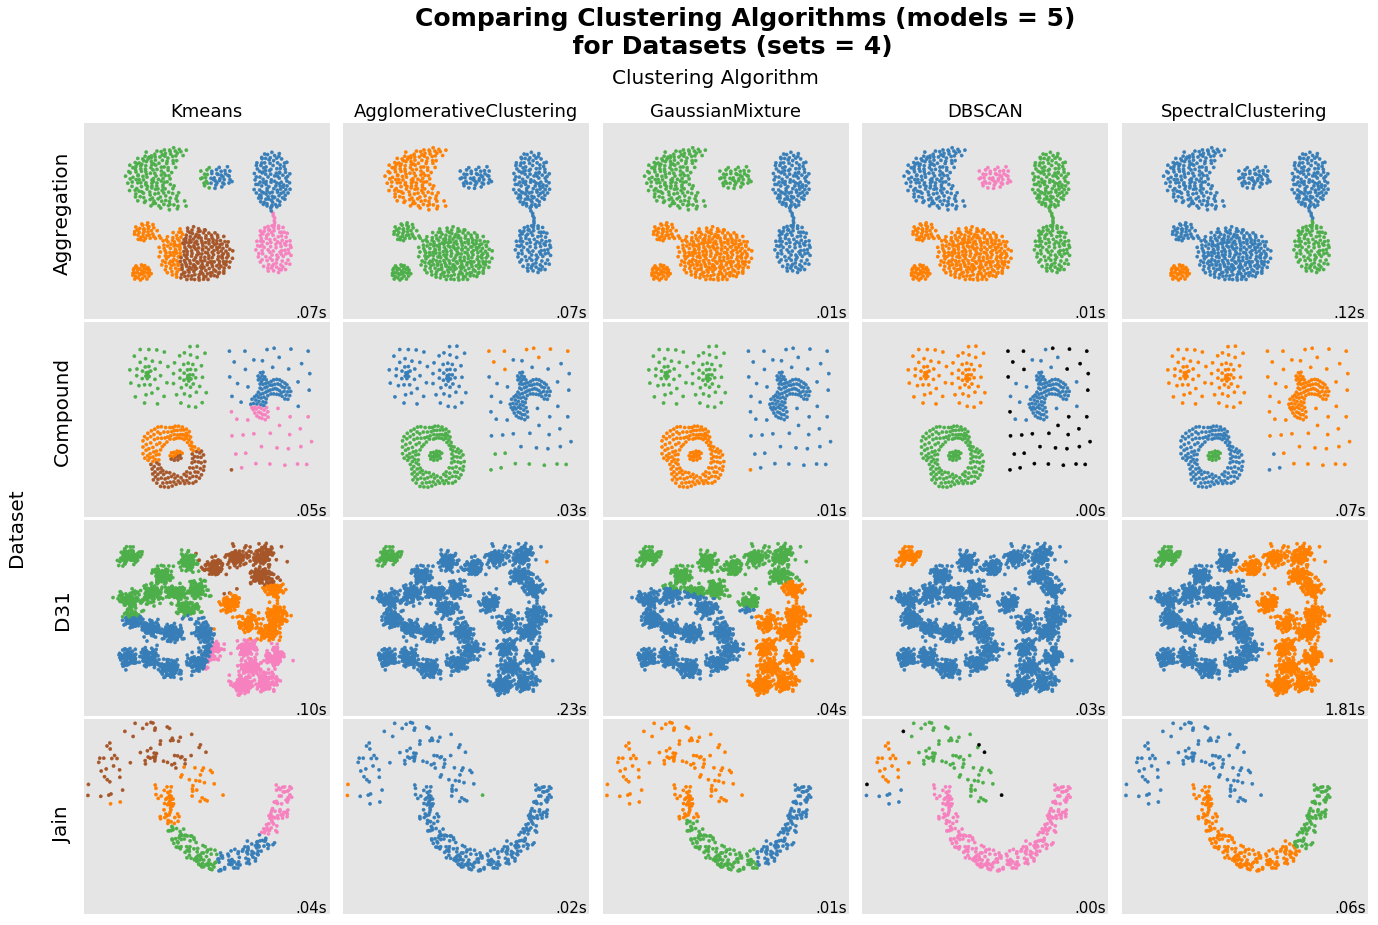

In [15]:
from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import time
import warnings

np.random.seed(0)

fig = plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=0.05, right=0.9, bottom=0.02, top=0.9, wspace=.05,
                    hspace=.01)

plot_num = 1

datasets = [(agg_X),(comp_X),(d31_X),(jain_X)]

#Plot image grid for 5 methods and 4 data sets:

for i_dataset, (dataset) in enumerate(datasets):
    
    #Tune parameters here:
    params = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3}

    X, y = dataset[:,0:2],dataset[:,2]

    # Normalize dataset
    X = StandardScaler().fit_transform(X)

    # Estimate bandwidth (mean shift)
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])
    
    # Connectivity matrix (structured Ward)
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    
    # Ensure connectivity is symmetric:
    connectivity = 0.5 * (connectivity + connectivity.T)
    
    #Create Instances of Cluster Method Objects (4 x 5 objects):
    #1) k-Means model:
    kmeans = KMeans(n_clusters=5, random_state=0)
    
    #2) Agglomerative Clustering model:
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    
    #3) Spectral Clustering model:
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    
    #4) DBSCAN model:
    dbscan = cluster.DBSCAN(eps=params['eps'])
    
    #5) Gaussian Matrix model:
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')
    
    #Dictionary to select given model by string entry as key:
    algorithm_dict = (
        ('Kmeans', kmeans),
        ('AgglomerativeClustering', average_linkage),
        ('GaussianMixture', gmm),
        ('DBSCAN', dbscan),
        ('SpectralClustering', spectral),
    )

    for name, algorithm in algorithm_dict:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(algorithm_dict), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

fig.text(0.03, 0.12, 'Jain', va='center', rotation='vertical', fontsize=20)
fig.text(0.03, 0.36, 'D31', va='center', rotation='vertical', fontsize=20)
fig.text(0.03, 0.58, 'Compound', va='center', rotation='vertical', fontsize=20)
fig.text(0.03, 0.80, 'Aggregation', va='center', rotation='vertical', fontsize=20)
fig.text(0.27, 1, 'Comparing Clustering Algorithms (models = 5)\n                  for Datasets (sets = 4)', va = 'center', rotation='horizontal', fontsize=25, weight = 1000)
fig.text(0.4, .95, 'Clustering Algorithm', va='center', rotation='horizontal', fontsize=20)
fig.text(0,.45, 'Dataset', va='center', rotation='vertical', fontsize=20)
plt.show()

**1c [cont.]**

The Aggregation dataset was best clustered by DBSCAN approach, likely due to this model's ability to identify core representative samples in higher density regions (i.e., in clustered samples) and use distance/eps to include those within a given distance. After tuning, the appropriate eps identified at least 4 large clusters. 

The Compound dataset was best clustered by the Guassian Mixture model. This is likely due to the distribution of this dataset into clusters that largely have higher density central clustering and lower density (relative) surrounding clustering of samples, which can be better modeled by a Gaussian distribution.

The D31 dataset was best clustered by the k-Means model, which likely performed best since the data were even cluster size, flat geometry, and had convex shaped clusters. Thus, the model could test different centroids and minimize the within cluster sum square error. 

Finally, the Jain dataset was best clustered by the Spectral Clustering method. The method likely performs well because there are a small number of clusters (2) and thus the samples can be reduced from higher dimension into a low dimension embedding of an affinity matrix.

## 2

### [25 points] Visualizing and clustering digits with PCA and t-SNE

**(a)** Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the resulting 2-dimensional representation of the data.

**(b)** t-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/). A video introducing this method can be found [here](https://www.youtube.com/watch?v=RJVL80Gg3lA&list=UUtXKDgv1AVoG88PLl8nGXmw) for those who are interested.

*NOTE: An important note on t-SNE is that it is an example of transductive learning. This means that the lower dimensional representation of the data is only applicable to the specific input data - you can't just add a new sample an plot it in the sample 2-dimensional space without entirely rerunning the algorithm and finding a new representation of the data.*

**(c)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? Given the comparative clustering performance that you observed and the note on t-SNE above, what are the pros and cons of PCA and t-SNE? *Note: You typically will not have labels available.*

**ANSWER**

**2a Load digits data, apply PCA, and plot resulting 2-D representation of data:**

In [21]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

#Load digits and organize arrays:

digits = load_digits()

X = digits.data / 64.0
y = digits.target

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['digit'] = y
df['digit'] = df['digit'].apply(lambda i: str(i))

X, y = None, None

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
# plt.gray()
# fig = plt.figure( figsize=(16,7) )
# for i in range(0,30):
#     ax = fig.add_subplot(3,10,i+1, title='Digit: ' + str(df.loc[rndperm[i],'digit'])+'\n' )
#     ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((8,8)).astype(float))
# plt.subplots_adjust(top=0.75, hspace = 0.4)
# plt.show()

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
#df['pca-three'] = pca_result[:,2]

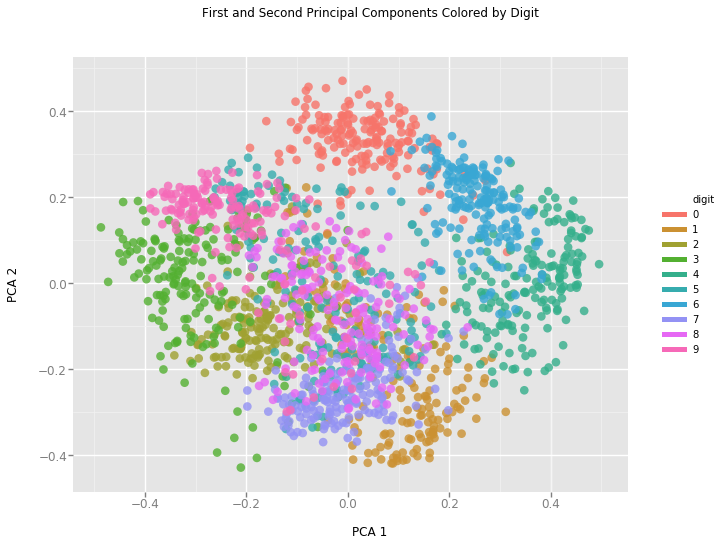

<ggplot: (7004099227)>

In [27]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
from ggplot import *

plot_PCA = ggplot( df.loc[rndperm[:3000],:], aes(x='pca-one', y='pca-two', color='digit') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components Colored by Digit") \
        + xlab("PCA 1") \
        + ylab("PCA 2")
plot_PCA

**2b t-SNE reduction and plot:**

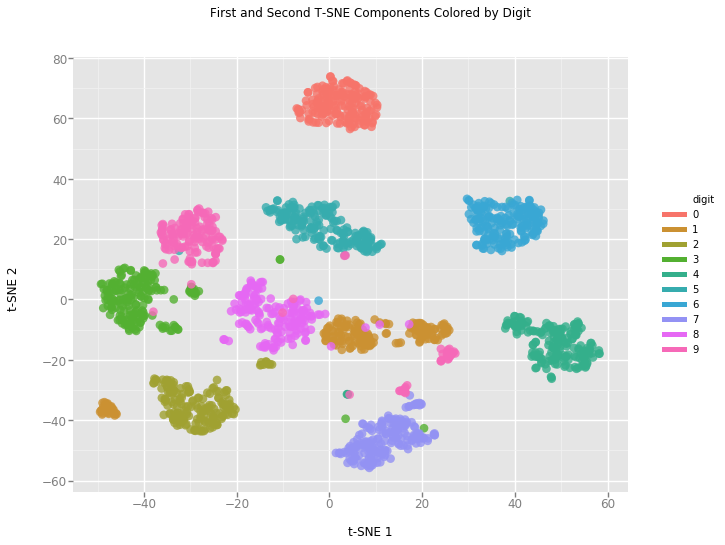

<ggplot: (-9223372029846891306)>

In [28]:
from sklearn.manifold import TSNE

from sklearn.datasets import load_digits
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

#load digits data from sci-kit learn:
# You can add the parameter data_home to wherever to where you want to download your data

digits = load_digits()

X = digits.data / 64.0
y = digits.target

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['digit'] = y
df['digit'] = df['digit'].apply(lambda i: str(i))

X, y = None, None

rndperm = np.random.permutation(df.shape[0])

X_tsne = TSNE(n_components=2).fit_transform(df[feat_cols].values)

df['tsne-one'] = X_tsne[:,0]
df['tsne-two'] = X_tsne[:,1] 

# import sys
# import warnings

# if not sys.warnoptions:
#     warnings.simplefilter("ignore")
    
from ggplot import *

plot_tsne = ggplot( df.loc[rndperm[:3000],:], aes(x='tsne-one', y='tsne-two', color='digit') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second T-SNE Components Colored by Digit") \
        + xlab("t-SNE 1") \
        + ylab("t-SNE 2")
plot_tsne

**3c**

The t-SNE approach appears to cluster the data into more compact, dense clusters relative to the PCA method. 

The principle components in PCA are arranged in an orthogonal basis, and are sorted by highest percentage of variance along the particular dimension out of the total variance. Thus, the direction of the principle component vectors helps to compare across predictor variables/parameters for which contribute to accounting for a higher percentage of the variance, depending on how they interact with the orthogonal PCs. Also, PC's calculated for a sample of data can be applied to other samples from a given IID sampling space. On the other hand, t-SNE does not provide the same type of intuitive distance-based relationships between clusters (i.e., the clusters are the products of dimensionality reduction by gradient descent given specific hyperparameters). Also, t-SNE components are specific to the sample data used to generate the component weights, and cannot be generalized to other samples necessarily, even if from the same IID sampling space. 

## 3

### [30 points] PCA for compression

From the digits dataset, extract all the 5's. Your going to create a compressed version of one of an image.

**(a)** Plot a number of examples of the original images.

**(b)** Perform PCA on the data. Create a plot showing the fraction of variance explained as you incorporate from $1$ to $N$ components. 

**(c)** Select an image (from your dataset of 5's) that you will "compress" using PCA. Use the principal components extracted in (b) for data compression: choose the top $k$ principal components and represent the data using a subset of the total principal components. Plot the original image, and compressed versions with different levels of compression (i.e. using different numbers of the top principal components): use $k=1,5,10,25$.

**(d)** How many principal components are required to well-approximate the data in (c)? How much compression is achieved in each case (express compression as the ratio of $k$ to the original dimension of the data $D$, so it ranges from $0$ to $1$). Comment on each case.

**ANSWER**

**3a plot examples of original images (5's only)**

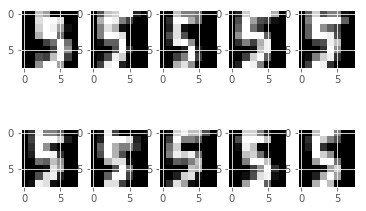

In [29]:
#Show 10 images of y = 1 (i.e., the number "3") in training set:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
# print('Figure X. 10 images of class y=1 (number 5)') plt.figure()

from sklearn.datasets import load_digits
digits = load_digits()
dig_count = 0

#Collect first 10 images (of digit = 5) to display:

for i in range(digits.data.shape[0]):
    if dig_count < 10:
        if digits.target[i] == 5:
            # plot with various axes scales
            plt.subplot(2, 5, (dig_count+1))
            image = digits.images[i]
            image = np.array(image, dtype='float') 
            pixels = image.reshape((8, 8)) 
            plt.imshow(pixels, cmap='gray') 
            plt.grid(True)
            dig_count += 1
        else: 
            pass
        pass
    else:
        plt.show()



**3b PCA on 5's digit dataset and plot fraction of variance explained vs. PCs**

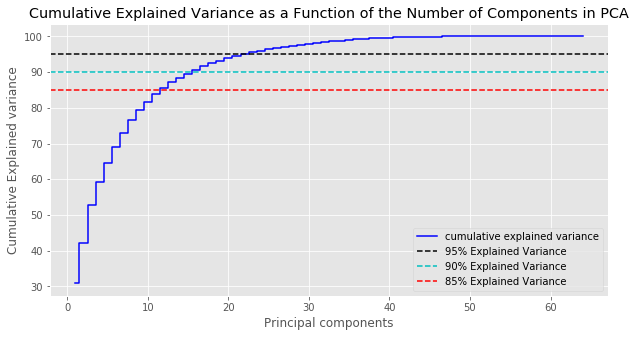

In [32]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits
digits = load_digits()
dig_count = 0

#Generate new array of only 5s:

new_data_5s = np.zeros((1, 8, 8))

for i in range(digits.data.shape[0]):
    if digits.target[i] == 5:
        image = digits.images[i]
        new_data_5s = np.append(new_data_5s, [image], axis=0)
    else:
        pass
    
#Update array and remove initialized 8x8 sub array of 0s and reshape data array:
new_data_5s = new_data_5s[1:184]
number_5s = new_data_5s.shape[0]
new_data_5s = new_data_5s.ravel()
new_data_5s = new_data_5s.reshape(number_5s, 64)

#Define new subarray components of only 5s digits:
X = new_data_5s / 64.0
y = np.array([5]*182)

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['digit'] = y
df['digit'] = df['digit'].apply(lambda i: str(i))

X, y = None, None

rndperm = np.random.permutation(df.shape[0])

# if n_components is not set all components are kept (64 in this case)
pca = PCA()

pca.fit(df[feat_cols].values)

pca.n_components_

# Summing explained variance
tot = sum(pca.explained_variance_)

var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
#print(var_exp[0:5])

# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp)

# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.step(range(1, 65), cum_var_exp, color = 'b', where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components in PCA')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

**3c Principle Components (1, 5, 10, 25) for Digit = "5"**

**3d Describe how many components and compression from 3c**

<Figure size 432x288 with 0 Axes>

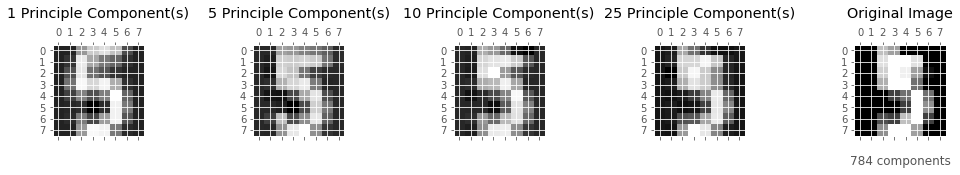

In [33]:
#3c: load digits (5 only) dataset, apply PCA for varying number of components, and plot images 
#(original and compressed)

%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#load digits data from sci-kit learn:
# You can add the parameter data_home to wherever to where you want to download your data

digits_5 = new_data_5s

#Principle components:

k_components = [1, 5, 10, 25]

plt.gray()
fig = plt.figure( figsize=(16,7) )

subplot_i = 1

#PCA: for k (1, 5, 10, 25)
for k in k_components:
    pca = PCA(n_components=k)
    lower_dim_data = pca.fit_transform(digits_5)
    components = pca.n_components_
    compressed_images = pca.inverse_transform(lower_dim_data)
    
    #Plotting:
    ax = fig.add_subplot(1,5,subplot_i, title='{} Principle Component(s)\n'.format(k))
    ax.matshow(compressed_images[0].reshape(8,8).astype(float))
    subplot_i += 1

# Plot Original Image
ax = fig.add_subplot(1, 5, 5, title = 'Original Image\n')
ax.matshow(digits_5[0].reshape(8,8).astype(float))
ax.set_xlabel('\n784 components')

plt.subplots_adjust(wspace = 1.2)
plt.show()

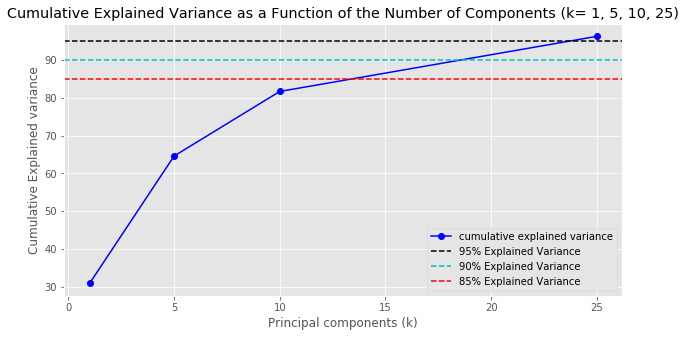


Table: Description of Number Components (k), Percent Variance Explained, and Compression of Image


,Number of components (k),% Var Explained,Image Compression from Original Size
0,1,30.843256,0.015625
1,5,64.617382,0.078125
2,10,81.736250,0.156250
3,25,96.339567,0.390625


In [35]:
#Compare number of components (k), fraction of total variance explained by k components, and calculate compression of 
#reduced images/data compared to original size

# Perform PCA on original data set of 5s:
pca = PCA()
pca.fit(digits_5)

# Summing explained variance:
tot = sum(pca.explained_variance_)
tot

var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)]

# Cumulative explained variance:
all_cum_var_exp = np.cumsum(var_exp)

#Now identify cumulative explained variance of selected numbers of components (k):
selected_var_components_k = []
for k in k_components:
    var = cum_var_exp[k-1]
    selected_var_components_k.append(var)
    
#Compression per number of components (k):
compression_components_k = []
for k in k_components:
    relative_compression = (k / pca.n_components_)
    compression_components_k.append(relative_compression)
    
# Plot out cumulative explained variance compared to values of k components = 1, 5, 10, 25:

plt.figure(figsize=(10, 5))
plt.plot(k_components, selected_var_components_k, color = 'b', label='cumulative explained variance', marker = 'o')
plt.title('Cumulative Explained Variance as a Function of the Number of Components (k= 1, 5, 10, 25)')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components (k)')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

#Generate Descriptive Table of number components (k), variance explained, and compression of reduced image
df_pca = pd.DataFrame({'Number of components (k)': k_components,
     '% Var Explained': selected_var_components_k,
     'Image Compression from Original Size': compression_components_k
    })

print('')
print('Table: Description of Number Components (k), Percent Variance Explained, and Compression of Image')
df_pca

**3d [cont.]** As seen in the plot and table, the optimal number of principle components (k) is between 10-25, depending on the constraints of the optimization required. Having k=25 components accounts for greater than 95% of total variance. At this number of components, the reduction in parameters is a factor of 0.39 of original image total parameters. However, we can see that using a k=10 components PCA provides >80% variance explained and can be reduced to a factor of 0.16 of the original parameters. Thus, it is clear that as more components are included, we can obtain a higher cumulative variance explained, but we sacrifice less compression (i.e., less dimensionality reduction). 

## 4

### [15 points] Build and test your own Neural Network for classification

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier.

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.

**(b)** Create a training and test dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset. Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one, and the test data on the other. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve.

**(c)** Suggest at least two ways in which you neural network implementation could be improved.

**ANSWER**

**4a and 4b**

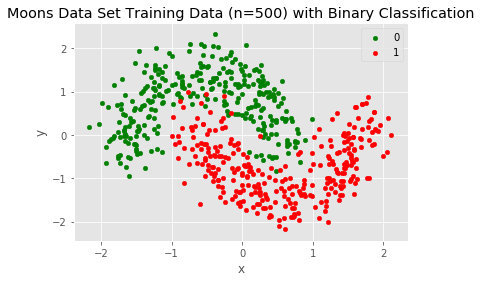

In [36]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# Generate the required dataset:

X, y = make_moons(n_samples = 600, noise=0.20, random_state=0)

# Preprocess dataset, shape arrays, split into training and test sets:

#Generate a bias term for X arrays and scale:
bias_terms = np.ones((X.shape[0],1))
X = np.hstack((X, bias_terms))
X = StandardScaler().fit_transform(X)

#Reshape y array to be broadcast shape of X:
y = y.reshape(-1,1)

#Generate Train/Test split: Train n= 500, Test n= 100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= (1/6))

#Plot moons dataset to ensure correct visualization: 
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y[:,0]))
colors = {0:'green', 1:'red'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.title('Moons Data Set Training Data (n=500) with Binary Classification')
plt.legend()
plt.show()

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from matplotlib.colors import ListedColormap
#from sklearn.utils.extmath import softmax

class Neural_Net:
    '''
    This is a neural network with 2 neurons in input layer.
    A1, the first layer has 5 neurons.
    A2, the second layer has 5 neurons.
    Output layer has 1 neuron (1 classification value).
    '''
    def __init__(self, max_iteration=500, learn_rate = 0.01):
        # Sets up neural network layers
        
        #Hyperparameters: iterations and learning rate
        self.max_iteration = max_iteration
        self.learn_rate = learn_rate
        
        # Initialize input layer: identify number of input neurons/parameters
        self.input_layer_neurons = 2    
        
        # Initialize hidden layers:
        self.a1_hidden_layer_neurons = 5
        self.a2_hidden_layer_neurons = 5
        
        # Initialize output layer:
        self.output_layer_neurons = 1

        #Set random number generator for initializing weights
        np.random.seed(0)
        
        # Initialize weights to random values
        self.weight_v1 = np.random.randn(self.input_layer_neurons+1, self.a1_hidden_layer_neurons)
        self.weight_v2 = np.random.randn(self.a1_hidden_layer_neurons, self.a2_hidden_layer_neurons)
        self.weight_v3 = np.random.randn(self.a2_hidden_layer_neurons, self.output_layer_neurons)

    def fit(self,X,y):
        #Fit method that takes in X and y, executes backpropagation, and calculates cost associated with a given 
        #iteration (run for max number of iterations defined in init method)
        
        collect_cost_hist = []
        
        for iteration in range(self.max_iteration):
            self.backward_prop(X,y)
            collect_cost_hist.append(self.cost_function(X,y))
            pass
        pass
    
    def predict(self,X):
        #Predict y_pred value based on probabilities from forward propogation using a step-wise threshold = 0.5
        self.y_prob = self.forward_prop(X)
        self.y_prob[self.y_prob >= 0.5] = 1
        self.y_prob[self.y_prob < 0.5] = 0
        self.y_pred = self.y_prob
        return self.y_pred

    def predict_proba(self, X):
        # Propogate inputs through network and output final predicted probabilities of y for each sample
        self.y_prob = self.forward_prop(X)
        return self.y_prob
    
    def softmax(self, Z):
       # Calculate exponent term first:
        exp_scores = np.exp(Z)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    def forward_prop(self, X):
        # A feedforward algorithm which takes inputs from input neurons and passes these through each hidden layer 
        # of the neural network, where z(i) = activation function(i-1)[z(i-1)] X W(i)
        
        #Linear activation of input vector:
        a0 = X
        
        #Generate weighted vector 1 (z1):
        self.z1 = np.dot(a0, self.weight_v1)
        
        #Activation 1 of weighted vector 1 (z1):
        self.a1 = self.sigmoid(self.z1)
        
        #Generate weighted vector 2 (z2):
        self.z2 = np.dot(self.a1,self.weight_v2)
        
        #Activation 2 of weighted vector 2 (z2):
        self.a2 = self.sigmoid(self.z2)
        
        #Generate weighted vector 3:
        self.z3 = np.dot(self.a2,self.weight_v3)
        
        #self.a3 = softmax(self.z3)
        
        self.y_pred = self.sigmoid(self.z3)
        
        return self.y_pred
    
    def sigmoid(self,Z):
        # Apply sigmoid activation function
        return 1/(1+np.exp(-Z))

    def deriv_sigmoid(self,Z):
        # Derivative of sigmoid activation function output
        return np.multiply((self.sigmoid(Z)) , np.subtract(1,self.sigmoid(Z)) )

    def backward_prop(self,X,y):
        # Backpropagation function: backpropogate error from learned values
        
        #Step 1: load weight probabilities from forward propogation 
        self.y_pred = self.forward_prop(X)
        
        #Step 2:Backpropagates error to weights from the hidden layer
        # to the starting input parameters
        
        #Calculate loss derivative with respect to output layer:
        loss_deriv_3 = np.multiply((y-self.y_pred), self.deriv_sigmoid(self.z3))
        db3 = np.dot(self.a2.T, loss_deriv_3)
        self.weight_v3 += db3 * self.learn_rate
        
        #Calculate loss derivative with respect to hidden layer 2
        loss_deriv_2 = np.multiply(np.dot(loss_deriv_3,self.weight_v3.T),self.deriv_sigmoid(self.z2))
        db2 = np.dot(self.a1.T, loss_deriv_2)
        self.weight_v2 += db2 * self.learn_rate

        #Calculate loss derivative with respect to hidden layer 1 and starting input neurons
        loss_deriv_1 = np.multiply(np.dot(loss_deriv_2,self.weight_v2.T),self.deriv_sigmoid(self.z1))
        db1 = np.dot(X.T, loss_deriv_1)
        self.weight_v1 += db1 * self.learn_rate
        pass

    def cost_function(self,X,y):
        # Cost function associated with predicted y by iteration of neural net and actual y
        self.y_pred = self.forward_prop(X)
        difference = np.multiply((y-self.y_pred),self.deriv_sigmoid(self.z1))
        cost = np.dot(np.transpose(X), difference)
        return cost
    
    def graph_X_and_DB(self, X, y, title):
        # Method for plotting either train or test data points with decision boundary from neural net class
        # Note: add title as arg
        
        cmap_light = ListedColormap(['#97efa2', '#ef9797'])
        cmap_bold = ListedColormap(['#028913', '#cc0202'])
        
        h = 0.02

        xx,yy = np.meshgrid(np.arange(-50,50),np.arange(-50,50))

        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                             np.arange(x2_min, x2_max, h))

        xx_all = np.c_[xx.ravel(), yy.ravel(),np.ones((xx.ravel().shape[0],1))]
        Z = self.predict(xx_all)

        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        plt.scatter(X[:, 0], X[:, 1], c=y.flatten()[:500], cmap=cmap_bold)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.title(title)
        return plt.show()
    

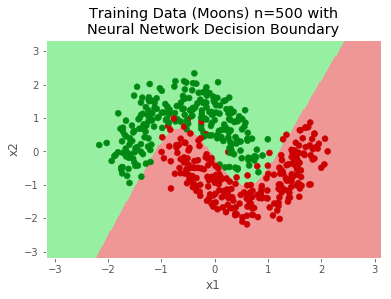

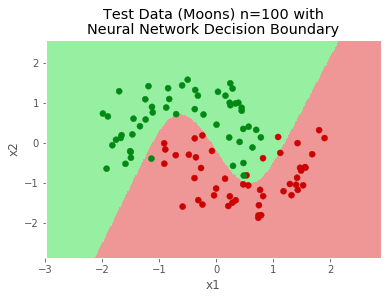

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt

#Train neural network:
neural_net = Neural_Net()
neural_net.fit(X_train, y_train)

#Plot Training Data with Decision Boundary:
neural_net.graph_X_and_DB(X_train, y_train, 'Training Data (Moons) n=500 with\nNeural Network Decision Boundary')

#Plot Test Data with Decision Boundary:
neural_net.graph_X_and_DB(X_test, y_test, 'Test Data (Moons) n=100 with\nNeural Network Decision Boundary')



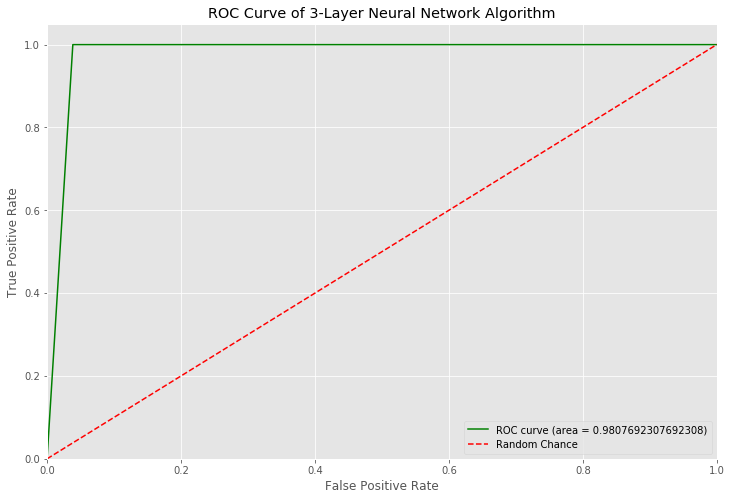

In [69]:
#Generate Model Metrics: ROC Curve

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, neural_net.predict(X_test))

plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, color='green',  label='ROC curve (area = {})'.format(metrics.auc(fpr,tpr)))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of 3-Layer Neural Network Algorithm')
plt.legend(loc="lower right")
plt.show()

**4c**

We could improve our model performance by (1) increasing the number of hidden layers in the model and by (2) increasing the depth of each layer (i.e., increasing the number of nodes/neurons per hidden layer). We could also perhaps experiment with different activation functions in the hidden layers and preceding the output layer (e.g., tanh or Rectified linear units (ReLU)). 